### This task is focused on creating a predictive model that has the ability to determine if a news article is fake or real.

##### The first thing to do will be to import the necessary python libraries needed to complete the project. 

##### Data used for training the model was retrieved from https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=Fake.csv

##### Data Preparation

#####  Data cleaning in order to prepare the data for analysis. 

##### Data analysis is used to uncover some insights. 

#####  Model Training .

##### Model Testing.

##### Save model for deployment and application of model by end-users.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#import cupy as cp


# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
import nltk
from nltk.corpus import stopwords
import re
import string

# library for train test split
from sklearn.model_selection import train_test_split

# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional


# Importing Datasets

### Exploratory Data Analysis

In [2]:
df = pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
# removing uncessary columns

columns_to_drop = ['title', 'Unnamed: 0']

df = df.drop(columns_to_drop, axis=1)
df

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


### Merging all the Dataframes

df = pd.concat([df1, df2, df3, df4], axis =0 )
df

### Data Cleaning

In [4]:
# shuffling the dataframe to ensure the data are properly mixed together

df = df.sample(frac = 1)

In [5]:
# Data cleaning to ensure the column is concise for analysis and model training
# removing (Reuters) from the true news columns
# Failure to do this can impair the performance of the predictive model
# when the data is tested with a different news articles

df["text"] = df["text"].replace("(Reuters)", "", regex=True)
df["text"] = df["text"].replace("[()]", "", regex=True)

In [6]:
df

,text,label
19992,Remember the Muslim couple that appeared at th...,1
41916,MUNICH - Lawmakers of Germany s Christian Soc...,0
54051,While Donald Trump says he d take the Chinese ...,1
3034,Tune in to the Alternate Current Radio Network...,1
68377,"XIAMEN, China - Russian President Vladimir Pu...",0
...,...,...
9763,DETROIT - Quality problems prompted two of Mi...,0
32168,WASHINGTON — Stephen K. Bannon has read the...,0
24349,- U.S. President Donald Trump on Monday appoi...,0
20633,CHICAGO - A federal judge on Thursday postpon...,0


In [7]:
# resetting the index

df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [8]:
df

,text,label
0,Remember the Muslim couple that appeared at th...,1
1,MUNICH - Lawmakers of Germany s Christian Soc...,0
2,While Donald Trump says he d take the Chinese ...,1
3,Tune in to the Alternate Current Radio Network...,1
4,"XIAMEN, China - Russian President Vladimir Pu...",0
...,...,...
72129,DETROIT - Quality problems prompted two of Mi...,0
72130,WASHINGTON — Stephen K. Bannon has read the...,0
72131,- U.S. President Donald Trump on Monday appoi...,0
72132,CHICAGO - A federal judge on Thursday postpon...,0


### Balancing the dataset

In [9]:
# Get all the true and fake new articles

true = df[df.label == 0]
fake = df[df.label== 1]


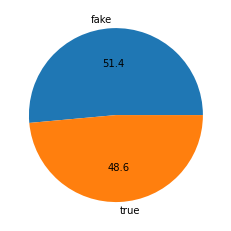

In [10]:
# checking the disparity in the data

plt.pie(df['label'].value_counts(), labels=['fake','true'],autopct="%0.1f")
plt.show()

In [11]:
# the data is relatively balanced
# Calculate the number of additional data points needed for the minority class

num_additional_samples = len(fake) - len(true)
num_additional_samples

2078

In [12]:
# to ensure it is well-balanced
# Randomly select data points from the minority class (true) with replacement

if num_additional_samples > 0:
    upsampled_true_df = true.sample(n=num_additional_samples, replace=True, random_state=44)
else:
    upsampled_true_df = true
    



In [13]:
 upsampled_true_df

,text,label
28951,NEW YORK - Nearly a third of U.S. counties li...,0
7251,WASHINGTON - The head of the U.S. Federal Com...,0
52924,The income and poverty report released on Tues...,0
8640,LONDON - Prime Minister Theresa May said on W...,0
39382,WASHINGTON - Millions of Americans would lose...,0
...,...,...
15724,The sports landscape is littered with failed p...,0
32436,President Barack Obama said former Secretary o...,0
54748,"CHARLOTTE, N.C. - Republican presidential nom...",0
24562,BAKU - An Azeri court on Monday released the ...,0


In [14]:
# Concatenate the upsampled minority class with the original data
df = pd.concat([df, upsampled_true_df], ignore_index=True)

# Shuffle the new dataFrame with balanced data to prevent any ordering biases
df= df.sample(frac=1, random_state=44).reset_index(drop=True)

# Verify the shape of the upsampled data
print(df.shape)

(74212, 2)


In [15]:
df

,text,label
0,EDINBURGH - Scotland s devolved government is...,0
1,Donald J. Trump entered the homestretch of the...,0
2,UNITED NATIONS - United Nations Secretary-Gen...,0
3,It isn t much of a secret these days that rich...,1
4,BEIRUT - Iran s Supreme Court has upheld a de...,0
...,...,...
74207,Sean Spicer resigned today from his position i...,1
74208,One of the arguments against the Affordable Ca...,1
74209,Scientists say they may have found a sort of m...,0
74210,The Associated Press won the Pulitzer Prize fo...,0


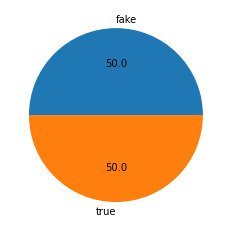

In [16]:
# checking to see if the data is balanced

plt.pie(df['label'].value_counts(), labels=['fake','true'],autopct="%0.1f")
plt.show()

### Visualizing data in wordcloud

In [17]:
# Create numpy list to visualize using wordcloud


true_text = " ".join(true['text'].astype(str).to_numpy().tolist())
fake_text = " ".join(fake['text'].astype(str).to_numpy().tolist())

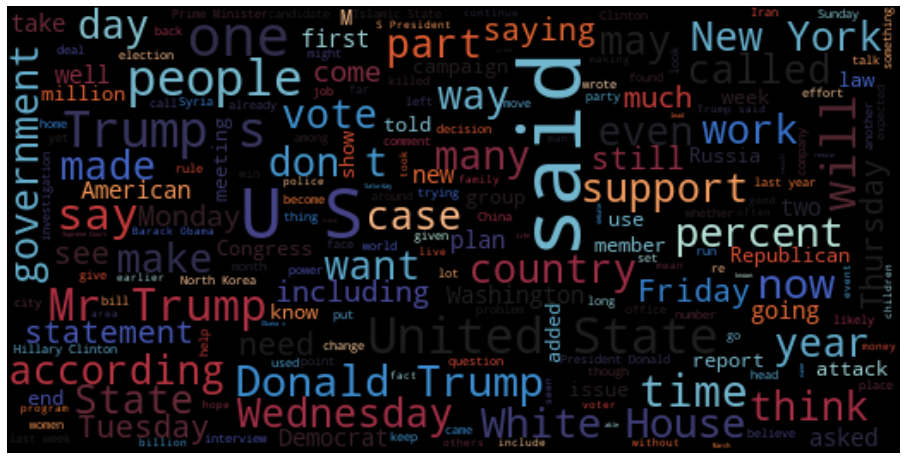

In [18]:
# wordcloud of true news articles

true_text_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='icefire').generate(true_text)
plt.figure(figsize=(16,10))
plt.imshow(true_text_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

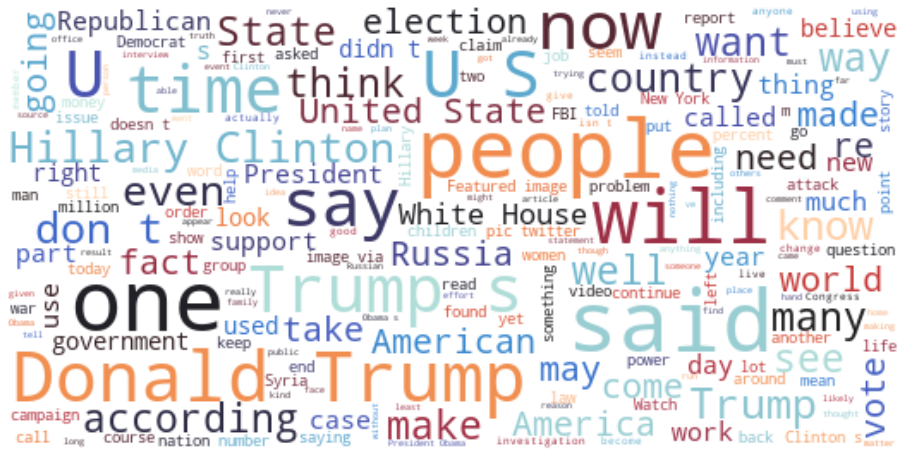

In [19]:
# wordcloud of fake news articles

fake_text_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="white", colormap='icefire').generate(fake_text)
plt.figure(figsize=(16,10))
plt.imshow(fake_text_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

### Analyzing the data

In [20]:
# Extracting crucial metrics from the data
# First = the wordcount of each article
# creating a new column known as "wordcount"

df['text'].fillna('', inplace=True)

# Calculate the word count
df["word_count"] = df['text'].apply(lambda x: len(x.split()))

# Display the first 10 rows with the word count column
df.head(10)

,text,label,word_count
0,EDINBURGH - Scotland s devolved government is...,0,216
1,Donald J. Trump entered the homestretch of the...,0,830
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424
3,It isn t much of a secret these days that rich...,1,617
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474
5,"WASHINGTON - Michael Flynn, President Donald ...",0,396
6,Become a Fan - Advertisement - It was not too ...,1,993
7,Jerry Seinfeld has lent his support to Kathy G...,0,350
8,ARCHIE ELAM is on his third career transition....,0,1235
9,Donald Trump has been crowned 2016 Person of t...,1,314


In [21]:
# Secondly = Character count of each article 

df["character_count"] = df['text'].apply(lambda x: len(x))
df

,text,label,word_count,character_count
0,EDINBURGH - Scotland s devolved government is...,0,216,1351
1,Donald J. Trump entered the homestretch of the...,0,830,5009
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605
3,It isn t much of a secret these days that rich...,1,617,3533
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871
...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158
74208,One of the arguments against the Affordable Ca...,1,409,2353
74209,Scientists say they may have found a sort of m...,0,1162,6886
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251


In [22]:
# Thirdly =  the number of sentence in each article

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,text,label,word_count,character_count,num_sentences
0,EDINBURGH - Scotland s devolved government is...,0,216,1351,10
1,Donald J. Trump entered the homestretch of the...,0,830,5009,35
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605,19
3,It isn t much of a secret these days that rich...,1,617,3533,28
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871,23
...,...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158,9
74208,One of the arguments against the Affordable Ca...,1,409,2353,15
74209,Scientists say they may have found a sort of m...,0,1162,6886,70
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251,31


In [23]:
# Fouthly = create a function to determine
# average word in each review

def avg_word(text):
    words = text.split()
    num_words = len(words)
    
    if num_words == 0:
        return 0  # Return 0 if there are no words in the text
    
    return sum(len(word) for word in words) / num_words

In [24]:
# create a column for average word

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df

,text,label,word_count,character_count,num_sentences,avg_word
0,EDINBURGH - Scotland s devolved government is...,0,216,1351,10,5.180556
1,Donald J. Trump entered the homestretch of the...,0,830,5009,35,5.014458
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605,19,5.089623
3,It isn t much of a secret these days that rich...,1,617,3533,28,4.722853
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871,23,5.033755
...,...,...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158,9,5.377976
74208,One of the arguments against the Affordable Ca...,1,409,2353,15,4.731051
74209,Scientists say they may have found a sort of m...,0,1162,6886,70,4.907057
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251,31,5.060325


In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
# Finally - Determine the stopword count

stop_words = stopwords.words('English')
df['stopword_count'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df

,text,label,word_count,character_count,num_sentences,avg_word,stopword_count
0,EDINBURGH - Scotland s devolved government is...,0,216,1351,10,5.180556,88
1,Donald J. Trump entered the homestretch of the...,0,830,5009,35,5.014458,288
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605,19,5.089623,144
3,It isn t much of a secret these days that rich...,1,617,3533,28,4.722853,261
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871,23,5.033755,185
...,...,...,...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158,9,5.377976,128
74208,One of the arguments against the Affordable Ca...,1,409,2353,15,4.731051,184
74209,Scientists say they may have found a sort of m...,0,1162,6886,70,4.907057,463
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251,31,5.060325,311


In [27]:
df.describe()

,label,word_count,character_count,num_sentences,avg_word,stopword_count
count,74212.000000,74212.000000,74212.000000,74212.000000,74212.000000,74212.000000
mean,0.500000,541.566404,3270.904867,22.479505,5.049663,206.358972
std,0.500003,623.847308,3719.807111,30.985984,1.781296,242.937761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,226.000000,1375.000000,8.000000,4.827425,82.000000
50%,0.500000,399.000000,2425.000000,15.000000,5.028191,152.000000
75%,1.000000,670.000000,4073.000000,27.000000,5.230392,257.000000
max,1.000000,24228.000000,142925.000000,1443.000000,149.000000,10014.000000


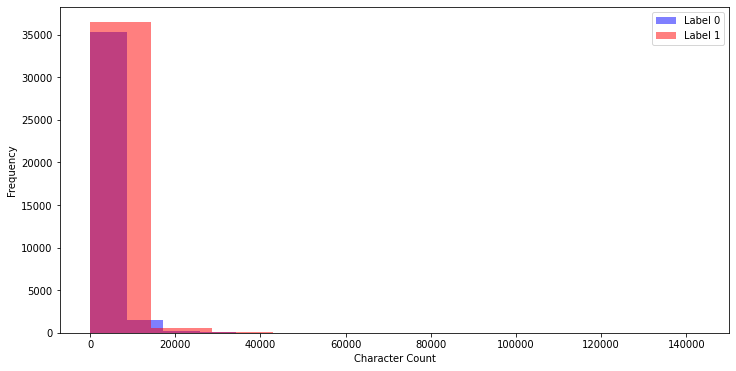

In [33]:
# Separate the data for each label (0 and 1)
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Plot histograms for each label


plt.figure(figsize=(12, 6))
plt.hist(df_label_0['character_count'], alpha=0.5, color='blue', label='Label 0')
plt.hist(df_label_1['character_count'], alpha=0.5, color='red', label='Label 1')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

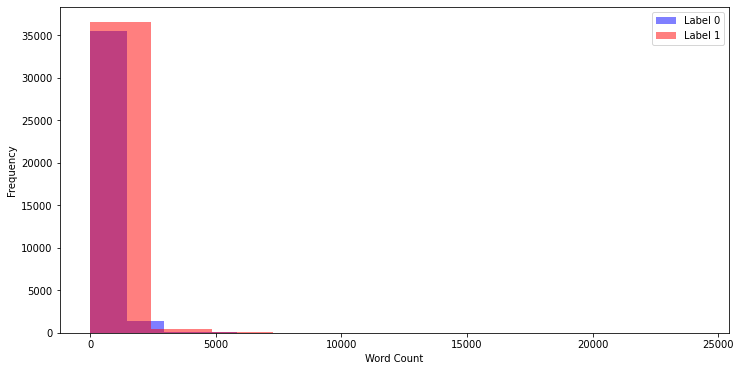

In [37]:
# Plot histograms for each label
plt.figure(figsize=(12, 6))
plt.hist(df_label_0['word_count'], alpha=0.5, color='blue', label='Label 0')
plt.hist(df_label_1['word_count'], alpha=0.5, color='red', label='Label 1')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

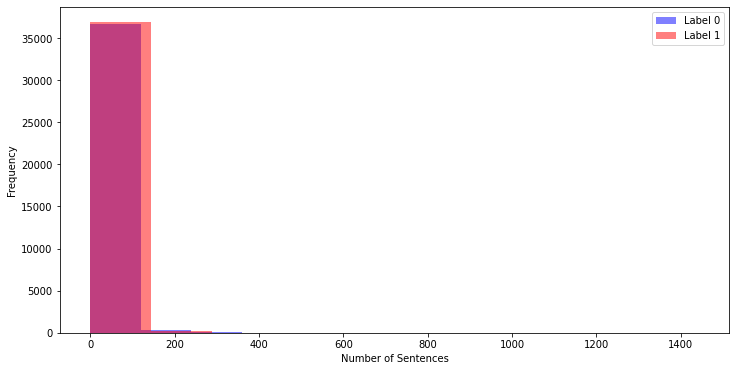

In [38]:
# Plot histograms for each label
plt.figure(figsize=(12, 6))
plt.hist(df_label_0['num_sentences'], alpha=0.5, color='blue', label='Label 0')
plt.hist(df_label_1['num_sentences'], alpha=0.5, color='red', label='Label 1')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

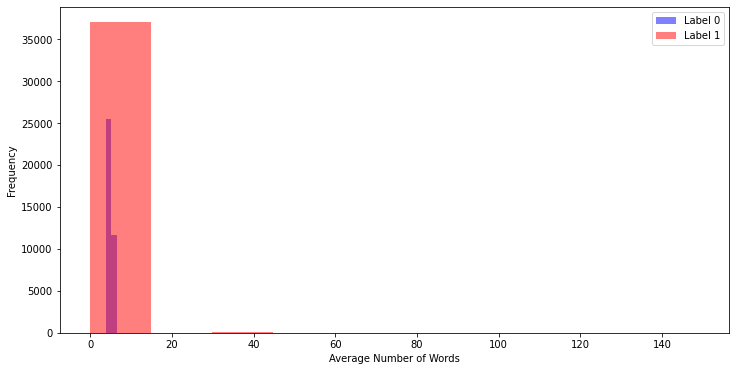

In [40]:
# Plot histograms for each label
plt.figure(figsize=(12, 6))
plt.hist(df_label_0['avg_word'], alpha=0.5, color='blue', label='Label 0')
plt.hist(df_label_1['avg_word'], alpha=0.5, color='red', label='Label 1')
plt.xlabel('Average Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

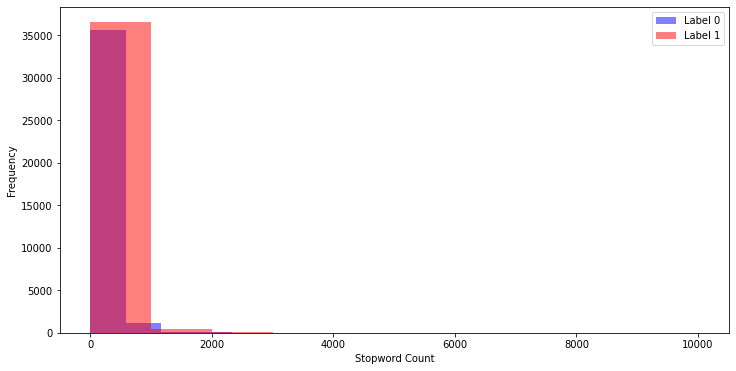

In [41]:
# Plot histograms for each label
plt.figure(figsize=(12, 6))
plt.hist(df_label_0['stopword_count'], alpha=0.5, color='blue', label='Label 0')
plt.hist(df_label_1['stopword_count'], alpha=0.5, color='red', label='Label 1')
plt.xlabel('Stopword Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Natural Language Processing

#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Lemmatization

In [42]:
# converting the words in the review to lower case

df['text_lower'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text_lower']

0        edinburgh - scotland s devolved government iss...
1        donald j. trump entered the homestretch of the...
2        united nations - united nations secretary-gene...
3        it isn t much of a secret these days that rich...
4        beirut - iran s supreme court has upheld a dea...
                               ...                        
74207    sean spicer resigned today from his position i...
74208    one of the arguments against the affordable ca...
74209    scientists say they may have found a sort of m...
74210    the associated press won the pulitzer prize fo...
74211    president obama said in an interview released ...
Name: text_lower, Length: 74212, dtype: object

In [43]:
# Punctuation removal

df['no-punctuation_text'] = df['text_lower'].str.replace('[^\w\s]', '', regex= True)
df

,text,label,word_count,character_count,num_sentences,avg_word,stopword_count,text_lower,no-punctuation_text
0,EDINBURGH - Scotland s devolved government is...,0,216,1351,10,5.180556,88,edinburgh - scotland s devolved government iss...,edinburgh scotland s devolved government issu...
1,Donald J. Trump entered the homestretch of the...,0,830,5009,35,5.014458,288,donald j. trump entered the homestretch of the...,donald j trump entered the homestretch of the ...
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605,19,5.089623,144,united nations - united nations secretary-gene...,united nations united nations secretarygenera...
3,It isn t much of a secret these days that rich...,1,617,3533,28,4.722853,261,it isn t much of a secret these days that rich...,it isn t much of a secret these days that rich...
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871,23,5.033755,185,beirut - iran s supreme court has upheld a dea...,beirut iran s supreme court has upheld a deat...
...,...,...,...,...,...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158,9,5.377976,128,sean spicer resigned today from his position i...,sean spicer resigned today from his position i...
74208,One of the arguments against the Affordable Ca...,1,409,2353,15,4.731051,184,one of the arguments against the affordable ca...,one of the arguments against the affordable ca...
74209,Scientists say they may have found a sort of m...,0,1162,6886,70,4.907057,463,scientists say they may have found a sort of m...,scientists say they may have found a sort of m...
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251,31,5.060325,311,the associated press won the pulitzer prize fo...,the associated press won the pulitzer prize fo...


In [44]:
# Remove Stopwords from review with no punctuation

df['text_no_stopword'] = df['no-punctuation_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df

,text,label,word_count,character_count,num_sentences,avg_word,stopword_count,text_lower,no-punctuation_text,text_no_stopword
0,EDINBURGH - Scotland s devolved government is...,0,216,1351,10,5.180556,88,edinburgh - scotland s devolved government iss...,edinburgh scotland s devolved government issu...,edinburgh scotland devolved government issued ...
1,Donald J. Trump entered the homestretch of the...,0,830,5009,35,5.014458,288,donald j. trump entered the homestretch of the...,donald j trump entered the homestretch of the ...,donald j trump entered homestretch campaign pr...
2,UNITED NATIONS - United Nations Secretary-Gen...,0,424,2605,19,5.089623,144,united nations - united nations secretary-gene...,united nations united nations secretarygenera...,united nations united nations secretarygeneral...
3,It isn t much of a secret these days that rich...,1,617,3533,28,4.722853,261,it isn t much of a secret these days that rich...,it isn t much of a secret these days that rich...,much secret days rich people pay fair share ta...
4,BEIRUT - Iran s Supreme Court has upheld a de...,0,474,2871,23,5.033755,185,beirut - iran s supreme court has upheld a dea...,beirut iran s supreme court has upheld a deat...,beirut iran supreme court upheld death sentenc...
...,...,...,...,...,...,...,...,...,...,...
74207,Sean Spicer resigned today from his position i...,1,336,2158,9,5.377976,128,sean spicer resigned today from his position i...,sean spicer resigned today from his position i...,sean spicer resigned today position president ...
74208,One of the arguments against the Affordable Ca...,1,409,2353,15,4.731051,184,one of the arguments against the affordable ca...,one of the arguments against the affordable ca...,one arguments affordable care act obamacare pe...
74209,Scientists say they may have found a sort of m...,0,1162,6886,70,4.907057,463,scientists say they may have found a sort of m...,scientists say they may have found a sort of m...,scientists say may found sort magic ingredient...
74210,The Associated Press won the Pulitzer Prize fo...,0,862,5251,31,5.060325,311,the associated press won the pulitzer prize fo...,the associated press won the pulitzer prize fo...,associated press pulitzer prize public service...


### Lemmatize the reviews
#### This cuts out the number of words that are available for analysis by combining similar forms into one base form.

In [45]:
# Import textblob
from textblob import Word

# Lemmatize final review format
df['lemmatized_text'] = df['text_no_stopword'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['lemmatized_text']).toarray()

In [48]:
X.shape

(74212, 3000)

In [49]:
y = df['label'].values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.809607222259651
[[6007 1400]
 [1426 6010]]
0.8110661268556005


In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.823957421006535
[[6012 1395]
 [1218 6218]]
0.8167608038880861


In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7666239978441016
[[5092 2315]
 [1149 6287]]
0.7308765403394559


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [59]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    #'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [60]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [61]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9239372094590043, 0.9263214816817629)

In [62]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9239372094590043
Precision -  0.9263214816817629
For  KN
Accuracy -  0.7041703159738597
Precision -  0.639820001836716
For  NB
Accuracy -  0.823957421006535
Precision -  0.8167608038880861
For  DT
Accuracy -  0.8144579936670484
Precision -  0.7698248040571692
For  LR
Accuracy -  0.9372768308293472
Precision -  0.9379291773259728
For  RF
Accuracy -  0.9446877315906488
Precision -  0.9464165204481036
For  AdaBoost
Accuracy -  0.8893754631812976
Precision -  0.8848299681190224
For  ETC
Accuracy -  0.9432729232634912
Precision -  0.9497953615279673
For  GBDT
Accuracy -  0.8697028902512969
Precision -  0.8581098672220776
For  xgb
Accuracy -  0.937074715354039
Precision -  0.934045393858478


In [63]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
7,ETC,0.943273,0.949795
5,RF,0.944688,0.946417
4,LR,0.937277,0.937929
9,xgb,0.937075,0.934045
0,SVC,0.923937,0.926321
6,AdaBoost,0.889375,0.884830
8,GBDT,0.869703,0.858110
2,NB,0.823957,0.816761
3,DT,0.814458,0.769825
1,KN,0.704170,0.639820


In [64]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.943273
1,RF,Accuracy,0.944688
2,LR,Accuracy,0.937277
3,xgb,Accuracy,0.937075
4,SVC,Accuracy,0.923937
5,AdaBoost,Accuracy,0.889375
6,GBDT,Accuracy,0.869703
7,NB,Accuracy,0.823957
8,DT,Accuracy,0.814458
9,KN,Accuracy,0.704170


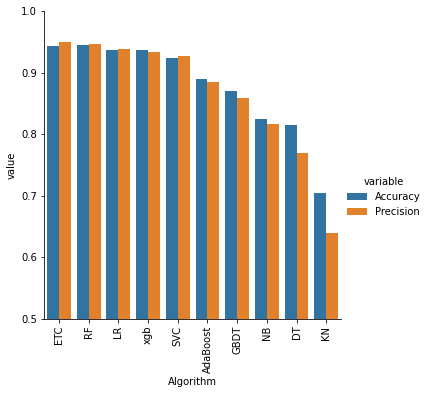

In [65]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model Tuning

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [67]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [68]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [69]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [70]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.943273,0.949795,0.943273,0.949795,0.943273,0.949795,0.943273,0.949795
1,RF,0.944688,0.946417,0.944688,0.946417,0.944688,0.946417,0.944688,0.946417
2,LR,0.937277,0.937929,0.937277,0.937929,0.937277,0.937929,0.937277,0.937929
3,xgb,0.937075,0.934045,0.937075,0.934045,0.937075,0.934045,0.937075,0.934045
4,SVC,0.923937,0.926321,0.923937,0.926321,0.923937,0.926321,0.923937,0.926321
5,AdaBoost,0.889375,0.884830,0.889375,0.884830,0.889375,0.884830,0.889375,0.884830
6,GBDT,0.869703,0.858110,0.869703,0.858110,0.869703,0.858110,0.869703,0.858110
7,NB,0.823957,0.816761,0.823957,0.816761,0.823957,0.816761,0.823957,0.816761
8,DT,0.814458,0.769825,0.814458,0.769825,0.814458,0.769825,0.814458,0.769825
9,KN,0.704170,0.639820,0.704170,0.639820,0.704170,0.639820,0.704170,0.639820


In [71]:
# Voting Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[('xgb', xgb), ('et', etc), ('RF', rfc), ('LR', lrc)],voting='hard')

In [73]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=Non...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=2,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('LR',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))])

In [74]:
from sklearn.metrics import accuracy_score, precision_score


In [75]:

y_pred = voting.predict(X_test)

# Calculate the accuracy and precision scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)


Accuracy: 0.951155426800512
Precision: 0.9672747528199415


In [76]:
# Applying stacking
estimators=[('xgb', xgb), ('et', etc), ('RF', rfc), ('LR', lrc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
#clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
#clf.fit(X_train,y_train)
#y_pred = clf.predict(X_test)
#print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9617328033416426
Precision 0.96544797107272


# Model Testing

In [77]:
model = voting
vectorizer = tfidf

In [78]:
def output_label(n):
    if n == 0:
        return "True News"
    elif n == 1:
        return "Fake News"

In [79]:
def predict_fake_news(news, model, vectorizer):
    news_list = [news]
    news_vector = vectorizer.transform(news_list).toarray()  # Convert to dense matrix
    prediction = model.predict(news_vector)
    return output_label(prediction[0])

In [80]:
# Example preprocessed news article
preprocessed_news_article = 'SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of steady growth triggered by a flurry of massive government contracts, OAS was ensnared in Operation Car Wash which unearthed an illegal contracting ring between state firms and builders. The ensuing scandal helped topple former Brazilian President Dilma Rousseff last year. Trained as an engineer, Mata Pires founded OAS with two colleagues in 1976 to do sub-contracting work for larger rival Odebrecht SA - the biggest of the builders involved in the probe.  Before the scandal, Forbes magazine estimated Mata Pires  fortune at $1.6 billion. He dropped off the magazine s billionaire list in 2015, months after OAS sought bankruptcy protection after the Car Wash scandal. While Mata Pires was never accused of wrongdoing in the investigations, creditors demanded he and his family stay away from the builder s day-to-day operations, people directly involved in the negotiations told Reuters at the time. He is survived by his wife and his two sons. '

# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: True News


In [81]:
# Example preprocessed news article
preprocessed_news_article = 'Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, and CBS. Yet, these corporations function under many different brands, such as FOX, ABC, CNN, Comcast, Wall Street Journal, etc, giving people the perception of choice   As Tavistock s researchers showed, it was important that the victims of mass brainwashing not be aware that their environment was being controlled; there should thus be a vast number of sources for information, whose messages could be varied slightly, so as to mask the sense of external control. ~ Specialist of mass brainwashing, L. WolfeNew Brainwashing Tactic Called AstroturfWith alternative media on the rise, the propaganda machine continues to expand. Below is a video of Sharyl Attkisson, investigative reporter with CBS, during which she explains how  astroturf,  or fake grassroots movements, are used to spin information not only to influence journalists but to sway public opinion. Astroturf is a perversion of grassroots. Astroturf is when political, corporate or other special interests disguise themselves and publish blogs, start facebook and twitter accounts, publish ads, letters to the editor, or simply post comments online, to try to fool you into thinking an independent or grassroots movement is speaking. ~ Sharyl Attkisson, Investigative ReporterHow do you separate fact from fiction? Sharyl Attkisson finishes her talk with some insights on how to identify signs of propaganda and astroturfing  These methods are used to give people the impression that there is widespread support for an agenda, when, in reality, one may not exist. Astroturf tactics are also used to discredit or criticize those that disagree with certain agendas, using stereotypical names such as conspiracy theorist or quack. '
# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: Fake News


In [82]:
# Example preprocessed news article
preprocessed_news_article ='According to a search warrant obtained by investigators and reviewed by Forbes, the equipment allegedly taken by the engineer cost nearly $90,000. It also added that when law enforcement agents searched his home, they found that he had “unauthorized administrator access” to radio communication technology used by the Air Education and Training Command (AETC), which is one of the nine major commands of the air force and in turn affected 17 defense department installations.'
# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: True News


In [83]:
# Example preprocessed news article
preprocessed_news_article ='TORONTO, July 31 (Reuters) - Canada new justice minister said on Monday that the government will act to address the heightened sense of insecurity felt by certain sections of the population, though "empirically" it is unlikely Canadians are less safe from crime, he said. Arif Virani, a Toronto member of parliament, was appointed justice minister in a broad cabinet shuffle by Prime Minister Justin Trudeau last week. Virani, who came to Canada as a refugee from Uganda in 1972, said high-profile attacks on public transit in Toronto and elsewhere have contributed to a perceived lack of security'

# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: True News


In [84]:
# Example preprocessed news article
preprocessed_news_article ='SAO PAULO, Aug 1 (Reuters) - On their tenth day at sea, the four Nigerian stowaways crossing the Atlantic in a tiny space above the rudder of a cargo ship ran out of food and drink. They survived another four days, according to their account, by drinking the sea water crashing just meters below them, before being rescued by Brazilian federal police in the southeastern port of Vitoria. Their remarkable, death-defying journey across some 5,600 kilometers (3,500 miles) of ocean underlines the risks some migrants are prepared to take for a shot at a better life."It was a terrible experience for me," said 38-year-old Thankgod Opemipo Matthew Yeye, one of the four Nigerians, in an interview at a Sao Paulo church shelter. "On board it is not easy. I was shaking, so scared. But I am here." Their relief at being rescued soon gave way to surprise.The four men said they had hoped to reach Europe and were shocked to learn they had in fact landed on the other side of the Atlantic, in Brazil. Two of the men have since been returned to Nigeria upon their request, while Yeye and Roman Ebimene Friday, a 35-year-old from Bayelsa state, have applied for asylum in Brazil.'

# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: True News


In [85]:
text = 'I just wanted to save my life, says Dhanabal, who came to Britain from India to study. But it was only the visa that came with the university place that interested him, and his plan was always to stay on after it expired. The 26-year-old relies on cash-in-hand jobs to survive, waiting in Sheffield for a call from a mystery man he calls "the boss" to give him construction or cleaning work for "pocket money" and food. I had no idea when I came to the UK how my life would be - I just wanted to leave India," says softly spoken Dhanabal, who is wearing a grey tracksuit, with a neat haircut and beard. I didn t think about what it would be like here. Dhanabal - we are not using his family name - says his politics got him into trouble with the Indian police and he paid an agency £7,000 to arrange a university place in Britain.'

In [86]:
# Example preprocessed news article
preprocessed_news_article = text
# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: True News


In [87]:
text = 'Former President Barack Obama announced late last night that he had filed for divorce from his wife of 27 years, Michelle Obama, after he revealed a secret double life as a homosexual. It is with a bit of sadness and a whole lot of relief that I announce that Michelle and I have decided to separate, as I have admitted to her, as I am doing now to the rest of the world, that I am a homosexual, said Barack Obama. This may come as a shock to many, and anger others, but this is my personal business, and I would hope that everyone could respect my privacy at this time. Representatives for Michelle Obama said that she and the former president would split amicably, and that Michelle herself was not particularly shocked by the revelation. We are very close, as close as two people could ever be, really, said Michelle in a prepared statement. “I’ve known for many years about Barack’s secret life, and I fully support him in the direction that his life takes him. He was and is an incredible leader, a loving father and family man, and now he can go on to make some other guy, or multiple guys, very happy. Honestly, I was prepared to just stay with her,” said Barack. I think she s secretly know for years that I was gay, and since it already came out in every conservative news site years ago that Michelle was actually born a man, I figured that was close enough. I was prepared to stick it out and keep having young guys on the side. Michelle nixed it, though. She said if this was going to become public news, then there s no reason we shouldnt just split up and reveal our true selves. Whoops, I guess I just proved those rumors about her secret to be true, too. Damn, sorry Michelle! Representatives for the Obama children, Malia and Sasha, could not be reached for comment, but their Facebook pages both were vacant of any comments on the split.'

In [88]:
# Example preprocessed news article
preprocessed_news_article = text
# Get the prediction
prediction = predict_fake_news(preprocessed_news_article, model, vectorizer)

# Print the result
print("Prediction:", prediction)

Prediction: Fake News


In [89]:
import joblib
joblib.dump(tfidf,open('vectorizer.pkl','wb'))
joblib.dump(voting,open('model.pkl','wb'))